In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset ID
dataset_id = "uip8-fykc"

# CSV endpoint
url = f"https://data.cityofnewyork.us/resource/{dataset_id}.csv"

df = pd.read_csv(url)

# check
df.head()


,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
0,298760433,2025-01-02T00:00:00.000,782,"WEAPONS, POSSESSION, ETC",236,DANGEROUS WEAPONS,PL 2650101,M,Q,115,3,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,299030225,2025-01-07T00:00:00.000,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,M,28,0,25-44,M,BLACK,997439,233857,40.808558,-73.952357,POINT (-73.952357 40.808558)
2,299127494,2025-01-08T00:00:00.000,849,"NY STATE LAWS,UNCLASSIFIED VIO",677,OTHER STATE LAWS,LOC00000V0,V,K,81,1,(null),(null),WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299188536,2025-01-09T00:00:00.000,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,M,7,2,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)
4,299533742,2025-01-16T00:00:00.000,155,RAPE 2,104,RAPE,PL 1303001,F,K,81,0,18-24,F,BLACK,1005319,190473,40.689464,-73.924029,POINT (-73.9240290899499 40.6894642952604)


In [ ]:
# Random sample of 5 rows
df.sample(5, random_state=42)

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
521,299289832,2025-01-12T00:00:00.000,563,PROSTITUTION,356,PROSTITUTION & RELATED OFFENSES,PL 2300000,M,Q,110,0,18-24,F,WHITE HISPANIC,1015219,211514,40.747190,-73.888232,POINT (-73.888232 40.74719)
737,299945498,2025-01-23T00:00:00.000,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL 1552500,M,S,121,0,(null),(null),WHITE HISPANIC,937069,148925,40.575324,-74.169839,POINT (-74.169839 40.575324)
740,300039234,2025-01-26T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,25-44,M,ASIAN / PACIFIC ISLANDER,1034017,183955,40.671459,-73.820596,POINT (-73.820596 40.671459)
660,300043710,2025-01-25T00:00:00.000,904,"INTOXICATED DRIVING,ALCOHOL",119,INTOXICATED/IMPAIRED DRIVING,VTL11920E3,F,Q,103,0,45-64,M,WHITE HISPANIC,1046340,197704,40.709111,-73.776045,POINT (-73.7760445452334 40.70911066955742)
411,299960414,2025-01-24T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200502,F,Q,116,0,(null),(null),BLACK,1059260,182476,40.667224,-73.729613,POINT (-73.729613 40.667224)


In [ ]:

#CLEAN AND PREPARE THE DATA

#Convert column names (headers) to uppercase
df.columns = df.columns.str.upper()

# Fill missing values in key columns
df["ARREST_BORO"] = df.get("ARREST_BORO", "UNKNOWN").fillna("UNKNOWN").str.upper()
df["PERP_RACE"] = df.get("PERP_RACE", "UNKNOWN").fillna("UNKNOWN").str.upper()
df["PERP_SEX"] = df.get("PERP_SEX", "UNKNOWN").fillna("UNKNOWN").str.upper()
df["AGE_GROUP"] = df.get("AGE_GROUP", "UNKNOWN").fillna("UNKNOWN").str.upper()
df["ARREST_PRECINCT"] = df.get("ARREST_PRECINCT", "UNKNOWN").fillna("UNKNOWN").astype(str).str.upper()

#Convert ARREST_DATE to weekday in all caps
if "ARREST_DATE" in df.columns:
    df["ARREST_DATE"] = pd.to_datetime(df["ARREST_DATE"], errors="coerce")
    df["WEEKDAY"] = df["ARREST_DATE"].dt.day_name().str.upper()
else:
    df["WEEKDAY"] = "UNKNOWN"
df.head()



,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,LATITUDE,LONGITUDE,GEOCODED_COLUMN,WEEKDAY
0,298760433,2025-01-02,782,"WEAPONS, POSSESSION, ETC",236,DANGEROUS WEAPONS,PL 2650101,M,Q,115,3,(NULL),(NULL),BLACK,0,0,0.000000,0.000000,POINT (0 0),THURSDAY
1,299030225,2025-01-07,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,M,28,0,25-44,M,BLACK,997439,233857,40.808558,-73.952357,POINT (-73.952357 40.808558),TUESDAY
2,299127494,2025-01-08,849,"NY STATE LAWS,UNCLASSIFIED VIO",677,OTHER STATE LAWS,LOC00000V0,V,K,81,1,(NULL),(NULL),WHITE,0,0,0.000000,0.000000,POINT (0 0),WEDNESDAY
3,299188536,2025-01-09,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,M,7,2,(NULL),(NULL),BLACK,0,0,0.000000,0.000000,POINT (0 0),THURSDAY
4,299533742,2025-01-16,155,RAPE 2,104,RAPE,PL 1303001,F,K,81,0,18-24,F,BLACK,1005319,190473,40.689464,-73.924029,POINT (-73.9240290899499 40.6894642952604),THURSDAY


In [ ]:
#check missing data
print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
ARREST_KEY           0
ARREST_DATE          0
PD_CD                0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           2
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
X_COORD_CD           0
Y_COORD_CD           0
LATITUDE             0
LONGITUDE            0
GEOCODED_COLUMN      0
WEEKDAY              0
dtype: int64

Percentage of missing values per column:
ARREST_KEY           0.0
ARREST_DATE          0.0
PD_CD                0.0
PD_DESC              0.0
KY_CD                0.0
OFNS_DESC            0.0
LAW_CODE             0.0
LAW_CAT_CD           0.2
ARREST_BORO          0.0
ARREST_PRECINCT      0.0
JURISDICTION_CODE    0.0
AGE_GROUP            0.0
PERP_SEX             0.0
PERP_RACE            0.0
X_COORD_CD           0.0
Y_COORD_CD           0.0
LATITUDE             0.0
LONGITUDE            0.0
GEOCODED

In [ ]:
#convert columns into category and count in each
categorical_cols = ['ARREST_BORO','AGE_GROUP','PERP_RACE','WEEKDAY','ARREST_PRECINCT']

for col in categorical_cols:
    df[col] = df[col].astype('category')

df[categorical_cols].dtypes
print(df[categorical_cols].dtypes)

for col in categorical_cols:
    print(f"\n=== Counts for {col} ===")
    print(df[col].value_counts())

#print('BRO SUMMARY:')
#print(df['ARREST_BORO'].describe())

#print('\nAGE SUMMARY:')
#print(df['AGE_GROUP'].describe())

#print('\nRACE SUMMARY:')
#print(df['PERP_RACE'].describe())

ARREST_BORO        category
AGE_GROUP          category
PERP_RACE          category
WEEKDAY            category
ARREST_PRECINCT    category
dtype: object

=== Counts for ARREST_BORO ===
ARREST_BORO
K    286
M    238
B    216
Q    215
S     45
Name: count, dtype: int64

=== Counts for AGE_GROUP ===
AGE_GROUP
(NULL)    613
25-44     235
45-64      76
18-24      61
<18         9
65+         6
Name: count, dtype: int64

=== Counts for PERP_RACE ===
PERP_RACE
BLACK                             506
WHITE HISPANIC                    263
WHITE                              99
BLACK HISPANIC                     85
ASIAN / PACIFIC ISLANDER           44
UNKNOWN                             2
AMERICAN INDIAN/ALASKAN NATIVE      1
Name: count, dtype: int64

=== Counts for WEEKDAY ===
WEEKDAY
WEDNESDAY    182
THURSDAY     179
TUESDAY      161
FRIDAY       149
MONDAY       115
SATURDAY     114
SUNDAY       100
Name: count, dtype: int64

=== Counts for ARREST_PRECINCT ===
ARREST_PRECINCT
40     48
14    

In [ ]:
#Descriptive Statistics – Category
def show_category_distribution(col_name):
    counts = df[col_name].value_counts()
    percents = df[col_name].value_counts(normalize=True) * 100
    display(pd.DataFrame({'count': counts, 'percent': percents.round(2)}))

for col in ['ARREST_BORO','AGE_GROUP','PERP_RACE','WEEKDAY','ARREST_PRECINCT']:
    print(f'--- {col} ---')
    show_category_distribution(col)
    print()

--- ARREST_BORO ---


,count,percent
ARREST_BORO,,
K,286,28.6
M,238,23.8
B,216,21.6
Q,215,21.5
S,45,4.5



--- AGE_GROUP ---


,count,percent
AGE_GROUP,,
(NULL),613,61.3
25-44,235,23.5
45-64,76,7.6
18-24,61,6.1
<18,9,0.9
65+,6,0.6



--- PERP_RACE ---


,count,percent
PERP_RACE,,
BLACK,506,50.6
WHITE HISPANIC,263,26.3
WHITE,99,9.9
BLACK HISPANIC,85,8.5
ASIAN / PACIFIC ISLANDER,44,4.4
UNKNOWN,2,0.2
AMERICAN INDIAN/ALASKAN NATIVE,1,0.1



--- WEEKDAY ---


,count,percent
WEEKDAY,,
WEDNESDAY,182,18.2
THURSDAY,179,17.9
TUESDAY,161,16.1
FRIDAY,149,14.9
MONDAY,115,11.5
SATURDAY,114,11.4
SUNDAY,100,10.0



--- ARREST_PRECINCT ---


,count,percent
ARREST_PRECINCT,,
40,48,4.8
14,42,4.2
110,30,3.0
103,29,2.9
75,27,2.7
...,...,...
88,4,0.4
111,3,0.3
104,3,0.3


In [ ]:
#'ARREST_BORO','AGE_GROUP','PERP_RACE','WEEKDAY','ARREST_PRECINCT'-got error so asked ChatGPt to rewrite the script for me forgot to do this code

by_boro = df["ARREST_BORO"].value_counts().reset_index()
by_boro.columns = ["Category", "Count"]

by_race = df["PERP_RACE"].value_counts().reset_index()
by_race.columns = ["Category", "Count"]

by_gender = df["PERP_SEX"].value_counts().reset_index()
by_gender.columns = ["Category", "Count"]

by_age = df["AGE_GROUP"].value_counts().reset_index()
by_age.columns = ["Category", "Count"]

by_precinct = df["ARREST_PRECINCT"].value_counts().reset_index()
by_precinct.columns = ["Category", "Count"]

by_weekday = df["WEEKDAY"].value_counts().reset_index()
by_weekday.columns = ["Category", "Count"]



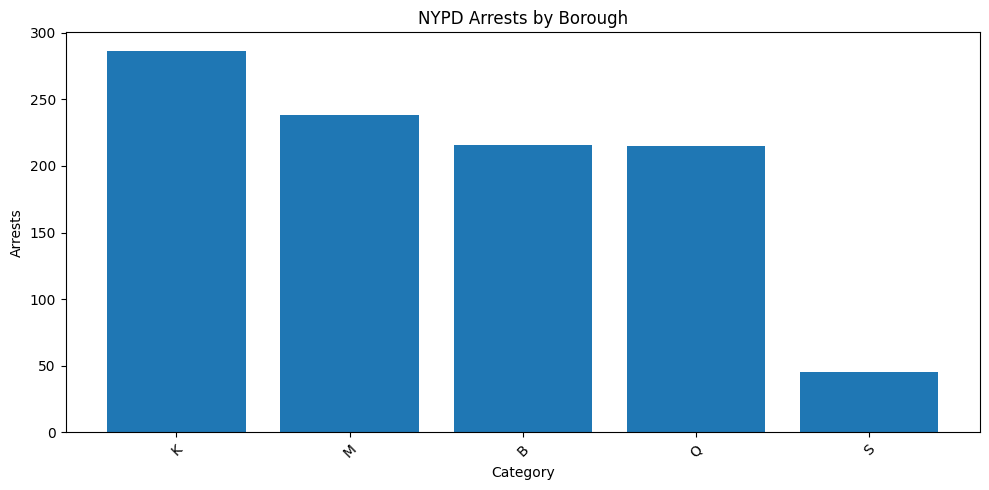


=== Arrests by Borough ===
  Category  Count
0        K    286
1        M    238
2        B    216
3        Q    215
4        S     45


In [ ]:
#plot bar
def create_bar_plot(df_grouped, title):
    plt.figure(figsize=(10,5))
    plt.bar(df_grouped["Category"], df_grouped["Count"])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel("Category")
    plt.ylabel("Arrests")
    plt.tight_layout()
    plt.show()

create_bar_plot(by_boro, "NYPD Arrests by Borough")
#create_bar_plot(by_race, "NYPD Arrests by Race")
#create_bar_plot(by_gender, "NYPD Arrests by Gender")
#create_bar_plot(by_age, "NYPD Arrests by Age Group")
#create_bar_plot(by_precinct.head(20), "Top 20 Precincts by Arrest Volume")
#create_bar_plot(by_weekday, "NYPD Arrests by Day of Week")


#SUMMARY TABLES

print("\n=== Arrests by Borough ===")
print(by_boro)

#print("\n=== Arrests by Race ===")
#print(by_race)

#print("\n=== Arrests by Gender ===")
#print(by_gender)

#print("\n=== Arrests by Age Group ===")
#print(by_age)

#print("\n=== Top 20 Precincts by Arrests ===")
#print(by_precinct.head(20))

#print("\n=== Arrests by Day of Week ===")
#print(by_weekday)

The arrest data reveals notable differences across New York City boroughs. Brooklyn (K) recorded the highest number of arrests at 286, followed by Manhattan (M) with 238, Bronx (B) with 216, and Queens (Q) with 215. Staten Island (S) had the lowest number at 45. This pattern is consistent with borough population sizes, urban density, and likely policing priorities.

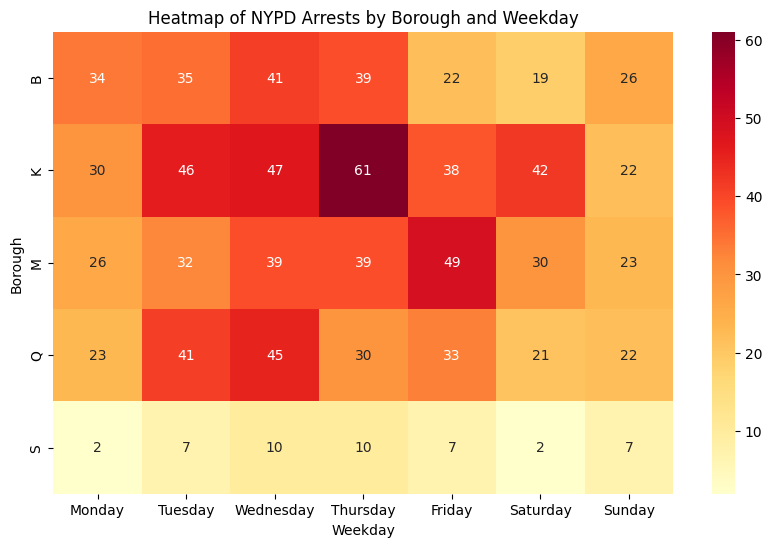

In [ ]:
#HeatMAp
!pip install seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Load the NYPD Arrest dataset I get errors if I dont do this all the time

dataset_id = "uip8-fykc"
url = f"https://data.cityofnewyork.us/resource/{dataset_id}.csv"

df = pd.read_csv(url)


# Prepare the data

# Make column names uppercase
df.columns = df.columns.str.upper()

# Fill missing boroughs and arrest dates
df["ARREST_BORO"] = df.get("ARREST_BORO", "UNKNOWN").fillna("UNKNOWN")
df["ARREST_DATE"] = pd.to_datetime(df["ARREST_DATE"], errors="coerce")

# Create a WEEKDAY column
df["WEEKDAY"] = df["ARREST_DATE"].dt.day_name()

# Keep only relevant columns
df_heat = df[["ARREST_BORO", "WEEKDAY"]].dropna()

# Prepare the data for heatmap
# Count arrests for each Borough per Weekday
heatmap_data = df_heat.groupby(["ARREST_BORO", "WEEKDAY"]).size().unstack(fill_value=0)

#reorder weekdays
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data[ordered_days]


#Plot the heatmap

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Heatmap of NYPD Arrests by Borough and Weekday")
plt.ylabel("Borough")
plt.xlabel("Weekday")
plt.show()


The heatmap shows that arrests vary by borough and day of the week. Some boroughs experience more arrests on certain days, indicating patterns in law enforcement activity or reporting practices. These differences may reflect police deployment schedules, community interactions, or other operational factors rather than actual differences in criminal behavior.

In [ ]:

#AGE × OFFENSE × BOROUGH TABLE
age_offense_boro = (df.groupby(["ARREST_BORO", "AGE_GROUP", offense_col])
    .size()
    .reset_index(name="Count"))

print("\n=== AGE × OFFENSE × BOROUGH SUMMARY ===")
print(age_offense_boro.head(1000))



=== AGE × OFFENSE × BOROUGH SUMMARY ===
    ARREST_BORO AGE_GROUP                       OFNS_DESC  Count
0             B    (null)  ALCOHOLIC BEVERAGE CONTROL LAW      1
1             B    (null)    ASSAULT 3 & RELATED OFFENSES     30
2             B    (null)  CRIMINAL MISCHIEF & RELATED OF      9
3             B    (null)               CRIMINAL TRESPASS      1
4             B    (null)                 DANGEROUS DRUGS     13
..          ...       ...                             ...    ...
306           S     25-44                   PETIT LARCENY      2
307           S     25-44        VEHICLE AND TRAFFIC LAWS      3
308           S     45-64               CRIMINAL TRESPASS      1
309           S     45-64                   PETIT LARCENY      1
310           S       <18                  FELONY ASSAULT      1

[311 rows x 4 columns]


In [ ]:
 #BAR PLOT FOR EACH BOROUGH-dont know why I cant get bar chart?


def plot_age_offense(boro_name):
    data = age_offense_boro[age_offense_boro["ARREST_BORO"] == boro_name]

    plt.figure(figsize=(12, 6))
    for age in data["AGE_GROUP"].unique():
        subset = data[data["AGE_GROUP"] == age]
        plt.bar(subset[offense_col], subset["Count"], label=age)

    plt.title(f"{boro_name}: Arrest Offenses by Age Group")
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.legend(title="Age Group")
    plt.tight_layout()
    plt.show()
    print(plot_age_offense)

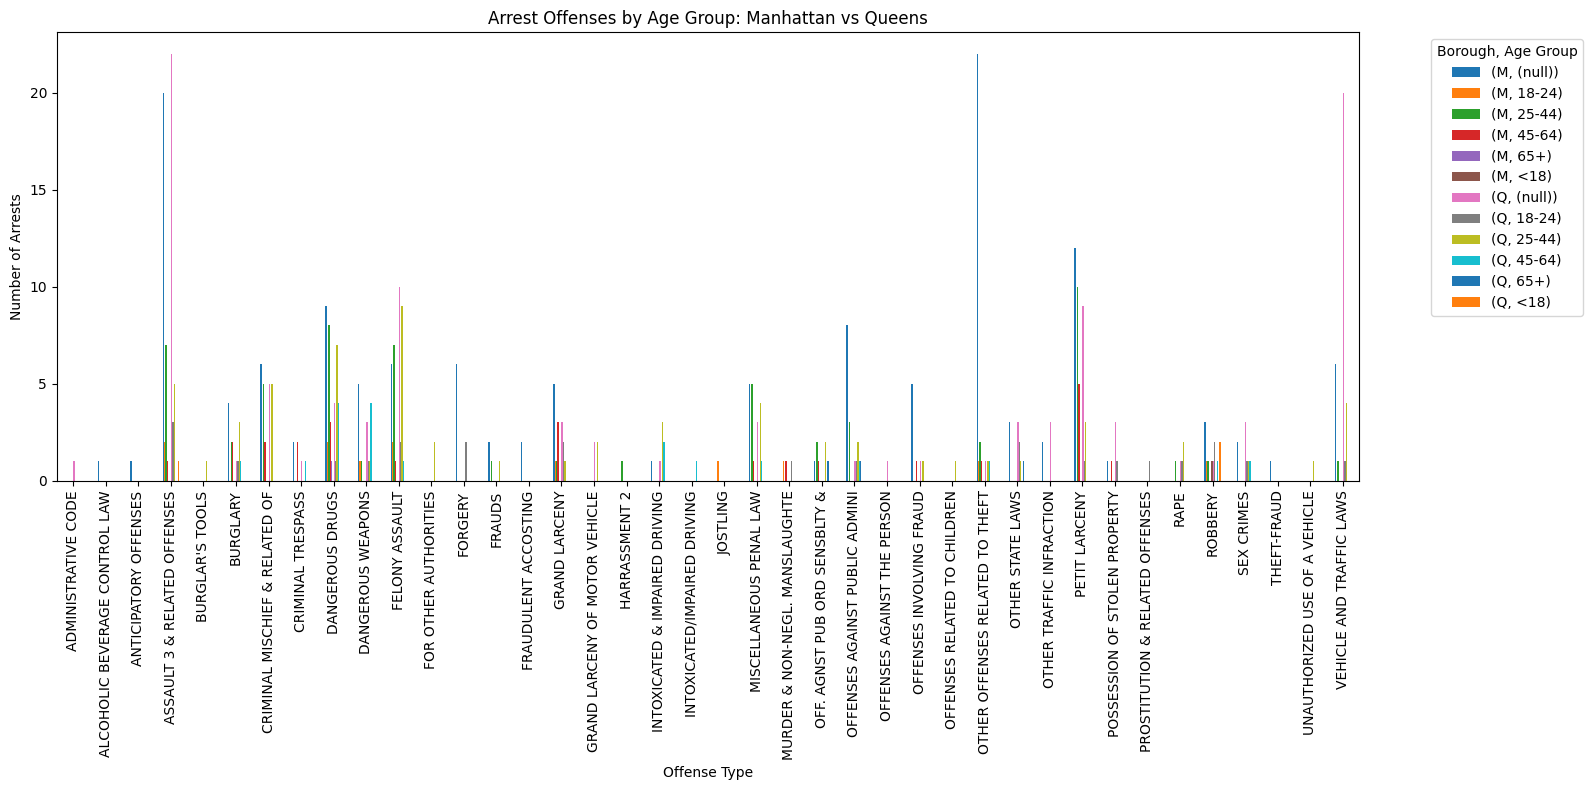

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_grouped_bar(boros=["M", "Q"], offense_col="OFNS_DESC"):
    # Filter data for boroughs
    data = age_offense_boro[age_offense_boro["ARREST_BORO"].isin(boros)]

    # Pivot: offense, age group, separate by borough
    pivot = data.pivot_table(
        index=[offense_col],
        columns=["ARREST_BORO", "AGE_GROUP"],
        values="Count",
        fill_value=0)

    # Plot grouped bars
    pivot.plot(kind="bar", figsize=(16,8))
    plt.title("Arrest Offenses by Age Group: Manhattan vs Queens")
    plt.xlabel("Offense Type")
    plt.ylabel("Number of Arrests")
    plt.xticks(rotation=90)
    plt.legend(title="Borough, Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Usage
plot_grouped_bar(["M", "Q"], offense_col="OFNS_DESC")


The chart shows that Manhattan and Queens have different patterns of arrests across age groups and offense types. Some age groups are arrested more frequently in one borough compared to the other. However, these differences may reflect policing strategies, patrol distribution, and reporting practices rather than actual differences in criminal behavior

In [ ]:
#Table
def make_pivot(boro_name):
    pivot = age_offense_boro[age_offense_boro["ARREST_BORO"] == boro_name] \
        .pivot_table(values="Count",
                     index="AGE_GROUP",
                     columns=offense_col,
                     fill_value=0)
    return pivot

boroughs = df["ARREST_BORO"].unique()

pivot_tables = {}
for b in boroughs:
    pivot_tables[b] = make_pivot(b)
    print(f"\n=== PIVOT TABLE: {b} ===")
    print(pivot_tables[b])



=== PIVOT TABLE: Q ===
OFNS_DESC  ADMINISTRATIVE CODE  ASSAULT 3 & RELATED OFFENSES  BURGLAR'S TOOLS  \
AGE_GROUP                                                                       
(null)                     1.0                          22.0              0.0   
18-24                      0.0                           3.0              0.0   
25-44                      0.0                           5.0              1.0   
45-64                      0.0                           0.0              0.0   
65+                        0.0                           0.0              0.0   
<18                        0.0                           1.0              0.0   

OFNS_DESC  BURGLARY  CRIMINAL MISCHIEF & RELATED OF  CRIMINAL TRESPASS  \
AGE_GROUP                                                                
(null)          1.0                             5.0                1.0   
18-24           1.0                             0.0                0.0   
25-44           3.0            

In [ ]:
df.columns.tolist()


['ARREST_KEY',
 'ARREST_DATE',
 'PD_CD',
 'PD_DESC',
 'KY_CD',
 'OFNS_DESC',
 'LAW_CODE',
 'LAW_CAT_CD',
 'ARREST_BORO',
 'ARREST_PRECINCT',
 'JURISDICTION_CODE',
 'AGE_GROUP',
 'PERP_SEX',
 'PERP_RACE',
 'X_COORD_CD',
 'Y_COORD_CD',
 'LATITUDE',
 'LONGITUDE',
 'GEOCODED_COLUMN',
 'WEEKDAY']

In [ ]:
offense_col = "OFNS_DESC"

age_offense_boro = (
    df.groupby(["ARREST_BORO", "AGE_GROUP", offense_col])
    .size()
    .reset_index(name="Count")
)

print("\n=== AGE × OFFENSE × BOROUGH SUMMARY ===")
print(age_offense_boro.head(20))



=== AGE × OFFENSE × BOROUGH SUMMARY ===
   ARREST_BORO AGE_GROUP                        OFNS_DESC  Count
0            B    (null)   ALCOHOLIC BEVERAGE CONTROL LAW      1
1            B    (null)     ASSAULT 3 & RELATED OFFENSES     30
2            B    (null)   CRIMINAL MISCHIEF & RELATED OF      9
3            B    (null)                CRIMINAL TRESPASS      1
4            B    (null)                  DANGEROUS DRUGS     13
5            B    (null)                DANGEROUS WEAPONS      5
6            B    (null)                   FELONY ASSAULT     16
7            B    (null)                          FORGERY      2
8            B    (null)                           FRAUDS      1
9            B    (null)                    GRAND LARCENY      5
10           B    (null)   GRAND LARCENY OF MOTOR VEHICLE      2
11           B    (null)   MURDER & NON-NEGL. MANSLAUGHTE      1
12           B    (null)    OFF. AGNST PUB ORD SENSBLTY &      5
13           B    (null)   OFFENSES AGAINST PUBLI

<Figure size 1600x1000 with 0 Axes>

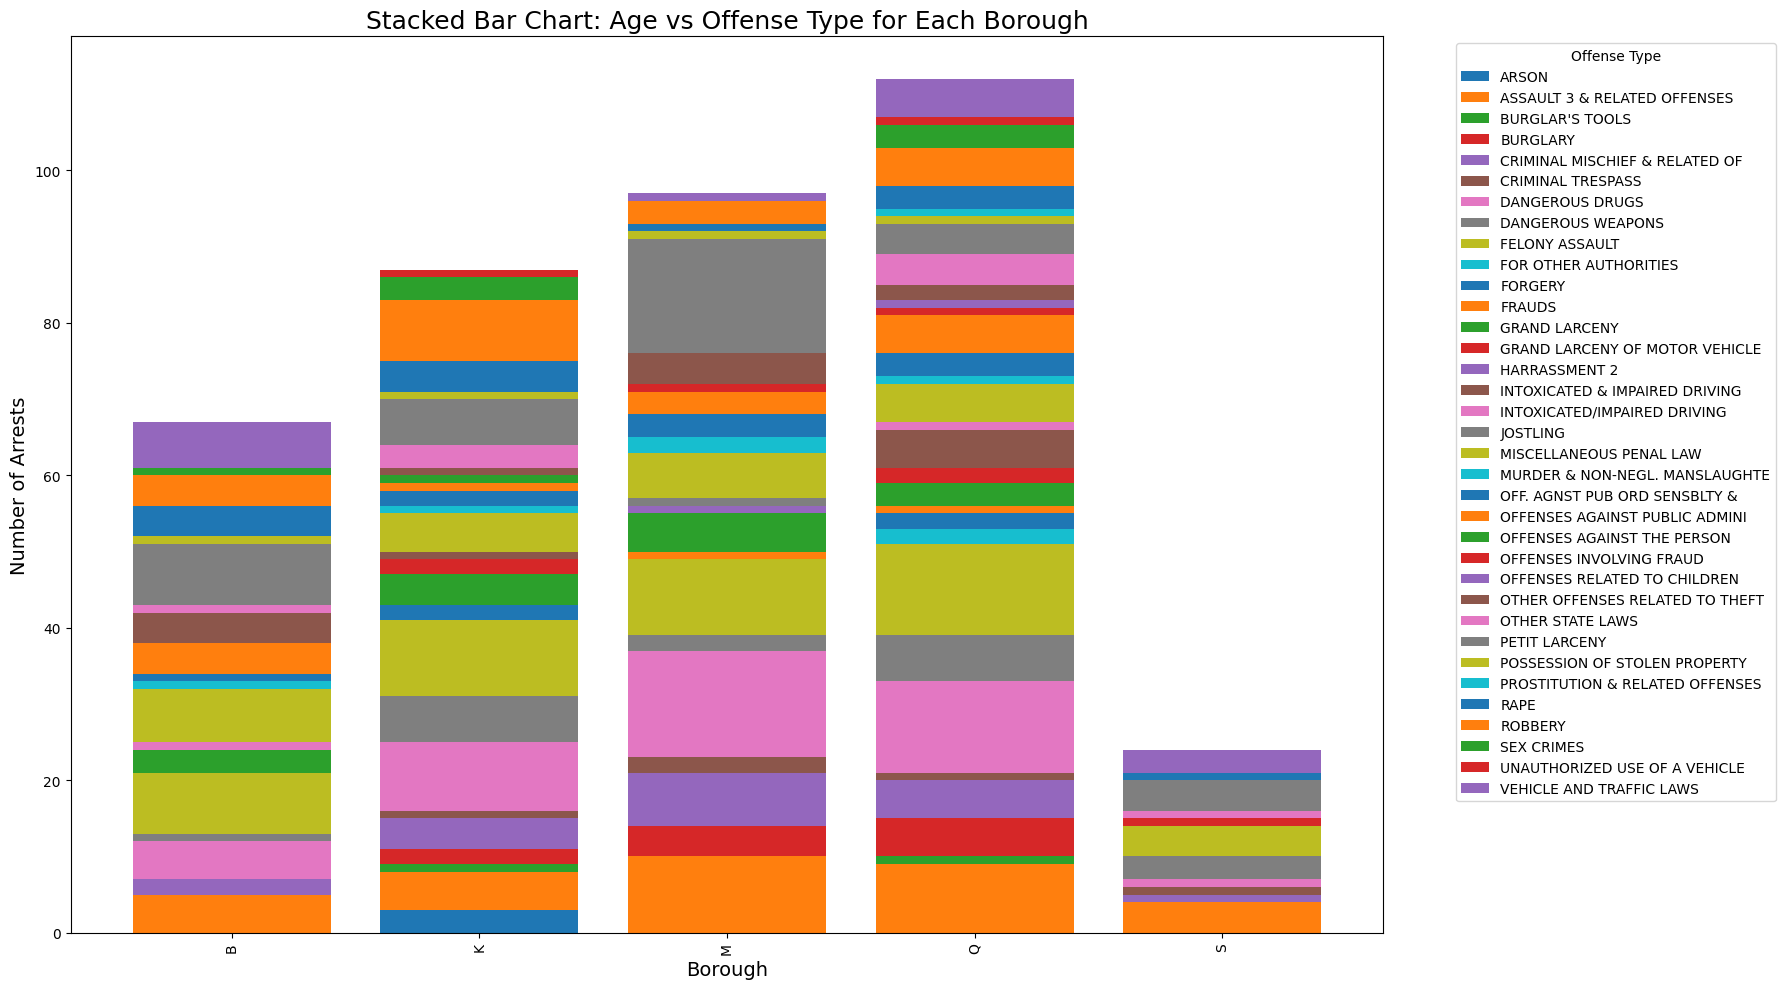

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. CLEANING: Remove missing values
# ------------------------------
df_clean = df.dropna(subset=["ARREST_BORO", "AGE_GROUP", "OFNS_DESC"])

# Keep only major age groups (optional cleaning)
valid_ages = ["<18", "18-24", "25-44", "45-64", "65+"]
df_clean = df_clean[df_clean["AGE_GROUP"].isin(valid_ages)]

# ------------------------------
# 2. GROUP DATA
# ------------------------------
# Count arrests by Borough × Age × Offense
age_offense_boro = (
    df_clean.groupby(["ARREST_BORO", "AGE_GROUP", "OFNS_DESC"])
    .size()
    .reset_index(name="Count")
)

# Pivot so offenses stack within each age group
pivot_df = age_offense_boro.pivot_table(
    index=["ARREST_BORO", "AGE_GROUP"],
    columns="OFNS_DESC",
    values="Count",
    fill_value=0
)

# ------------------------------
# 3. PLOT: STACKED BAR CHART
# ------------------------------
plt.figure(figsize=(16, 10))

pivot_df.groupby(level=0).sum().plot(
    kind="bar",
    stacked=True,
    figsize=(18, 10),
    width=0.8
)

plt.title("Stacked Bar Chart: Age vs Offense Type for Each Borough", fontsize=18)
plt.xlabel("Borough", fontsize=14)
plt.ylabel("Number of Arrests", fontsize=14)
plt.legend(title="Offense Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

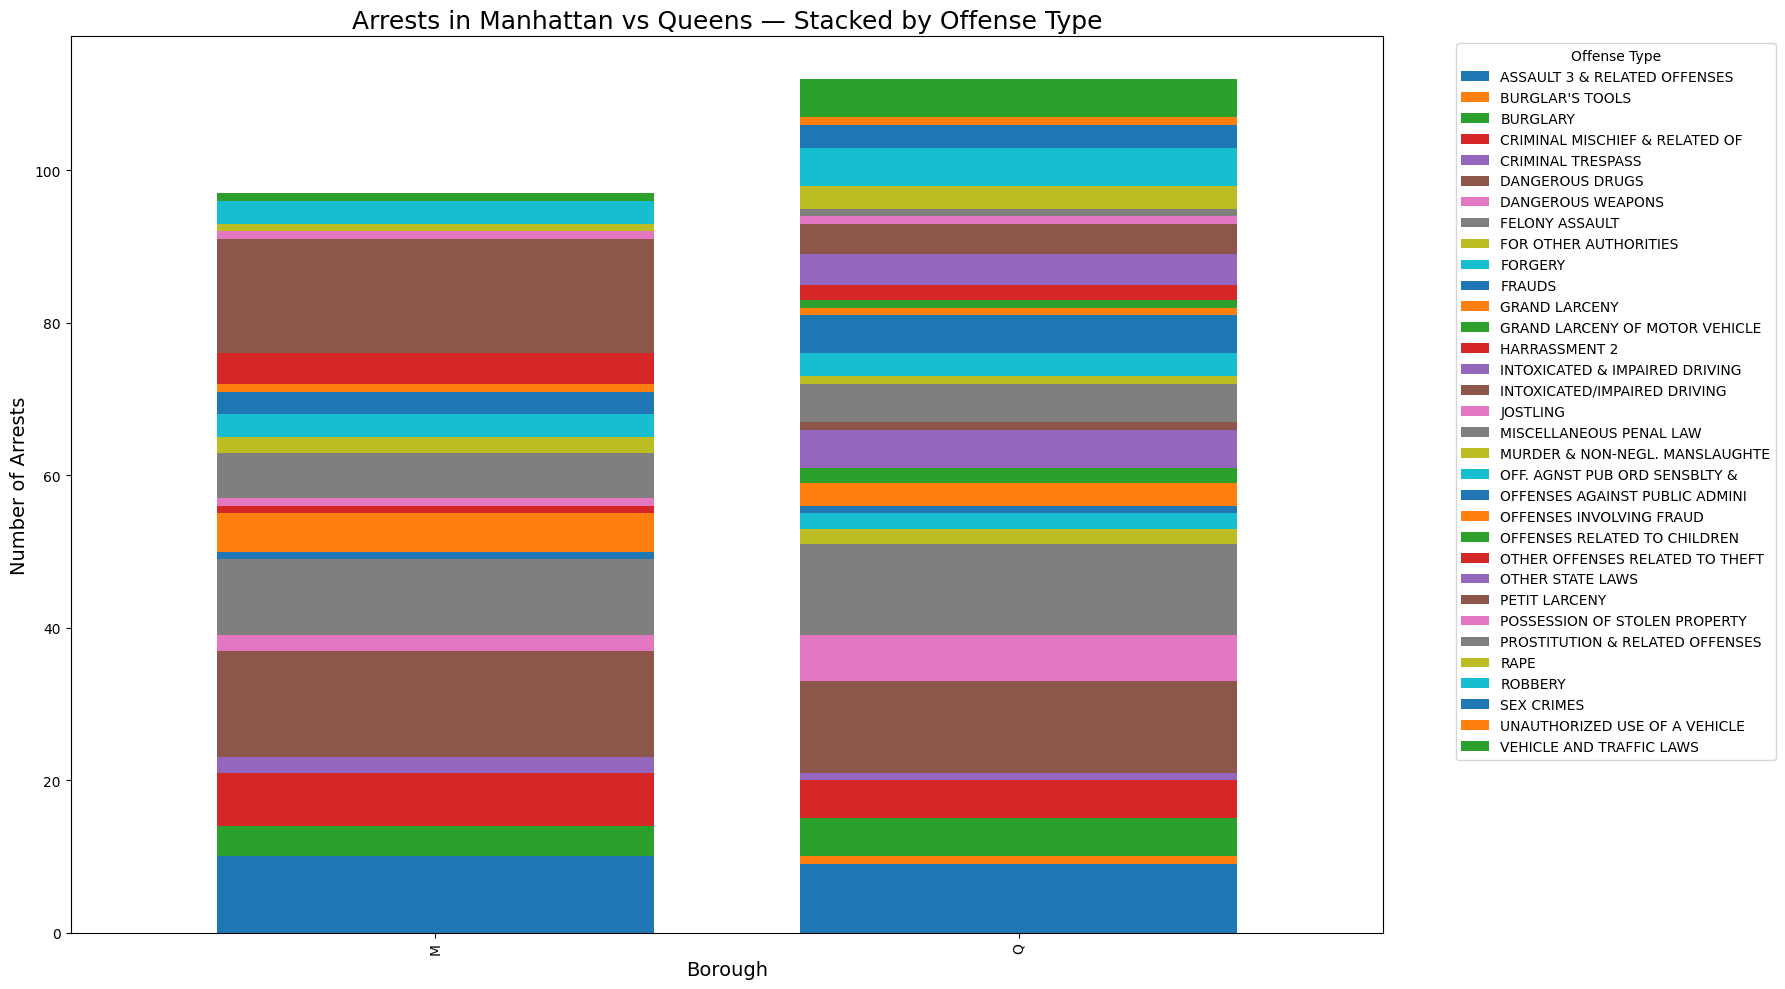

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CLEANING

df_clean = df.dropna(subset=["ARREST_BORO", "AGE_GROUP", "OFNS_DESC"])

# Keep only major age groups for a cleaner chart
valid_ages = ["<18", "18-24", "25-44", "45-64", "65+"]
df_clean = df_clean[df_clean["AGE_GROUP"].isin(valid_ages)]

# Filter for Manhattan (M) and Queens (Q)
df_boro = df_clean[df_clean["ARREST_BORO"].isin(["M", "Q"])]

# GROUP DATA

# Count arrests by Borough × Age × Offense Type
grouped = (
    df_boro.groupby(["ARREST_BORO", "AGE_GROUP", "OFNS_DESC"])
    .size()
    .reset_index(name="Count")
)

# Pivot table for stacked bar chart
pivot_df = grouped.pivot_table(
    index=["ARREST_BORO", "AGE_GROUP"],
    columns="OFNS_DESC",
    values="Count",
    fill_value=0
)

# ------------------------------
# STACKED BAR CHART
# ------------------------------
plt.figure(figsize=(16, 10))

pivot_df.groupby(level=0).sum().plot(
    kind="bar",
    stacked=True,
    figsize=(18, 10),
    width=0.75
)

plt.title("Arrests in Manhattan vs Queens — Stacked by Offense Type", fontsize=18)
plt.xlabel("Borough", fontsize=14)
plt.ylabel("Number of Arrests", fontsize=14)
plt.legend(title="Offense Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()



The analysis shows that Manhattan and Queens have different arrest patterns across age groups and offense types. Some age groups appear more often in arrests in one borough than the other. However, these differences may be influenced by police presence, reporting practices, and community factors rather than actual crime levels. This means the data should be interpreted carefully, keeping potential bias in mind.